# Important Attributes for Satisfied Airline Customers
### CIS9655 James Paguay

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
Before Covid-19 impacted the world in 2020, I went on vacation to Puerto Rico with my brother to visit the wonderful island. I was lucky enough to have an amazing experience before the pandemic paused the airline industry. However, as we learn more about the virus, create vaccines, and implement safety guidelines, a little normality seems to be returning. 

The airline industry is one of many that is recovering from a disastrous year when most people were not flying, or countries had closed their borders. Yet, there was a significant increase in customer complaints according to multiple news sources. Reports from KSN(1), Travel Pulse(2), and the Airline Quality Rating(3) revealed that customer complaints skyrocketed throughout 2020. 

This led me to analyze a dataset of Airline Passenger Satisfaction(4), with the intent of revealing important attributes that lead to satisfied customers. Airline companies can use these insights to increase customer satisfaction which could lead to higher revenues in return. As the second year of the pandemic continues, receiving less customer complaints should be the goal of all airline companies.

We want to look the at the columns which contain satisfaction levels in particular, since they describe a airline service which can be improved on. These columns include  __Seat_comfort__, __Departure/Arrival_time_convenient__, __Food_and_drink__, __Gate_location__, __Inflight_wifi_service__, __Inflight_entertainment__, __Online_support__,__Ease_of_Online_booking__, __On-board_service__, __Leg_room_service__,__Baggage_handling__, __Checkin_service__, __Cleanliness__, and __Online_boarding__.

#### Article and Dataset Links
1 - https://www.ksn.com/news/local/airline-quality-rating-reveals-deluge-of-complaints-and-bright-spots-amid-pandemic/             
2 - https://www.travelpulse.com/news/airlines/complaints-from-airline-passengers-rose-last-year.html                              
3 - https://commons.erau.edu/aqrr/30/                                                                                              
4 - https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction

## Data Cleanup
Before we began our analysis, we had to clean up certain aspects of the dataset. 

First, I replaced spaces between column names with underscores to ensure data extraction could happen without issues.

Next, I drop all rows with values = 0, particularly for the satisfaction levels of each column such as seat comfort, food and drink, etc. I believed values of 0 = Not Applicable since most satisfaction scales are from 1 to 5, with 1 being the lowest and 5 being the highest.

Finally, once this was done, we could begin the exploratory analysis.

In [11]:
airline_df = pd.read_csv('Invistico_Airline.csv')
airline_df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [12]:
airline_df.shape

(129880, 23)

In [13]:
airline_df.columns = airline_df.columns.str.replace(' ','_')
airline_df.columns

Index(['satisfaction', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

In [14]:
airline_df = airline_df[(airline_df != 0).all(1)]
airline_df.head(10)

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
1043,dissatisfied,Male,Loyal Customer,46,Personal Travel,Eco,2453,1,1,1,...,5,3,1,4,1,2,2,3,3,15.0
1044,dissatisfied,Male,Loyal Customer,63,Personal Travel,Eco,2011,1,1,1,...,5,5,1,5,2,1,2,5,25,25.0
1047,dissatisfied,Male,Loyal Customer,28,Personal Travel,Eco,1965,1,1,1,...,5,5,3,2,1,3,2,5,10,7.0
1050,dissatisfied,Male,Loyal Customer,13,Personal Travel,Eco,1647,1,1,1,...,3,3,3,4,1,2,1,3,39,18.0
1052,dissatisfied,Male,Loyal Customer,45,Personal Travel,Eco,2172,1,1,1,...,2,2,1,5,1,1,2,2,6,3.0
1058,dissatisfied,Male,Loyal Customer,23,Personal Travel,Eco,2135,1,1,1,...,4,3,4,2,1,4,1,4,265,245.0
1059,dissatisfied,Male,Loyal Customer,33,Personal Travel,Eco Plus,949,1,1,1,...,4,4,1,1,1,3,1,4,23,42.0
1065,dissatisfied,Male,Loyal Customer,17,Personal Travel,Eco,3828,1,1,1,...,5,5,1,5,1,2,2,5,52,49.0
1071,dissatisfied,Female,Loyal Customer,24,Personal Travel,Eco Plus,3288,1,1,1,...,3,2,1,1,1,3,3,3,201,208.0
1077,dissatisfied,Male,Loyal Customer,29,Personal Travel,Eco,2919,1,1,1,...,5,4,3,1,3,2,3,4,6,3.0


In [15]:
airline_df.shape

(40115, 23)

In [16]:
airline_df.satisfaction.value_counts()

dissatisfied    20792
satisfied       19323
Name: satisfaction, dtype: int64

In [17]:
## If changes need to be done during the Exploratory Analysis.
expl_df = airline_df

## Exploratory Analysis
In this process we can start to graph our data and see what kind of relationships certain variables have with each other. However, there is one thing to note, columns __Seat_comfort__, __Departure/Arrival_time_convenient__, __Food_and_drink__, __Gate_location__, __Inflight_wifi_service__, __Inflight_entertainment__, __Online_support__,__Ease_of_Online_booking__, __On-board_service__, __Leg_room_service__,__Baggage_handling__, __Checkin_service__, __Cleanliness__, and __Online_boarding__ are labeled as integer data types. But, realistically they are categorical as they represent different levels of satisfaction. 

### Distribution of Age
Our age column is a numeric type that can be used to explore if younger people are more satisfied than older people. Or vice versa. First, we want to see the distribution of this variable using a histogram, to understand what the age range is.

<AxesSubplot:xlabel='Age', ylabel='Count'>

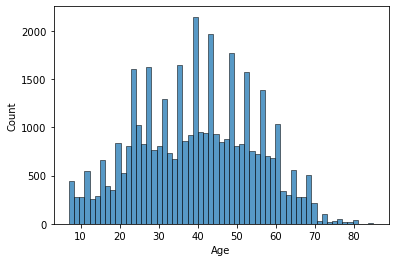

In [18]:
sns.histplot(airline_df, x = 'Age')

Our dataset includes a good range of ages. It seems the youngest are around 7/8 while the oldest are older than 80 but not 90.

### Class vs Age and Gender
The median age for both genders within each class increases as the class gets more expensive.

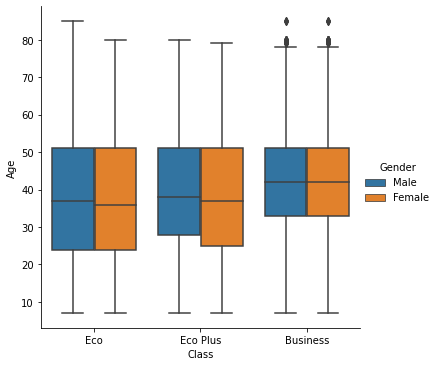

In [19]:
sns.catplot(x = 'Class', y = 'Age', hue = "Gender", data = airline_df, 
            kind = 'box', ci = None)

### Gender vs Customer_Type
Next, we use a count plot to visualize to see how many males and females are loyal or disloyal customers. 
This might be able to explain why so many people are unsatisfied with the airline service if there are many disloyal
customers.

Nevertheless, after this we can plot this variable against the satisfaction variable.

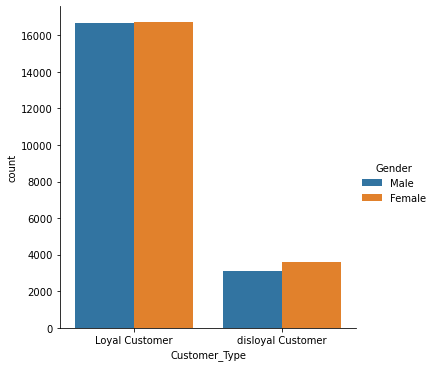

In [20]:
sns.catplot(x = 'Customer_Type', hue = 'Gender', data = airline_df, 
            kind = 'count', ci = None)

### Satisfaction vs Gender
We can see that there are more dissatifised males than there are females, while there are more satisfied females than males.

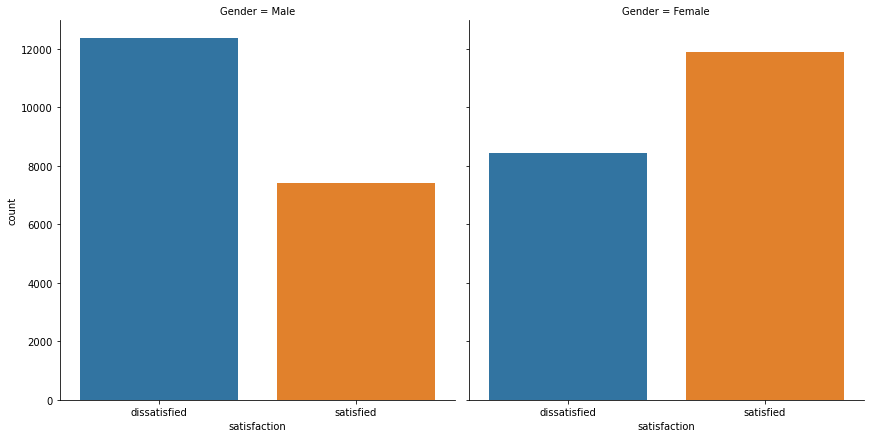

In [21]:
sns.catplot(x = 'satisfaction', col = 'Gender', kind = 'count', 
            data = airline_df, height = 6)

### Satisfaction vs Customer_Type
As noted, if a customer tends to be loyal, their satisfaction level is high. However, dissatisfied level is also high for loyal customers, indicating that customer types do not really influence satisfaction levels.

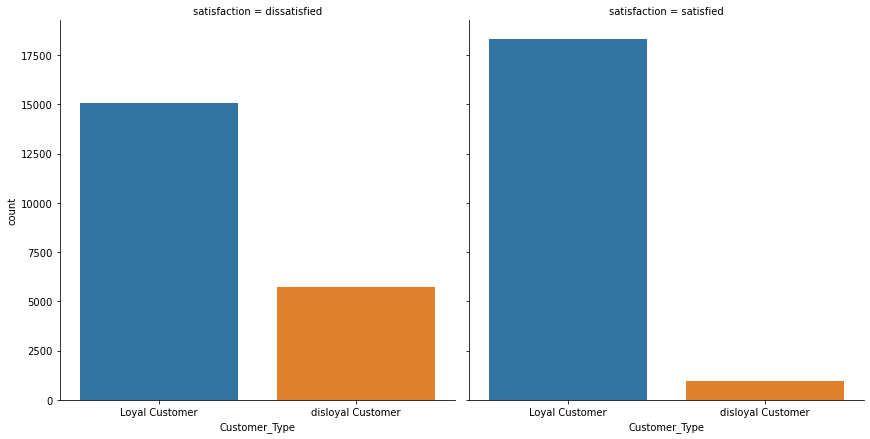

In [22]:
sns.catplot(x = 'Customer_Type', col = 'satisfaction', kind = 'count', 
            data = airline_df, height = 6)

### Age and Customer_Type vs Satisfaction
We see that age is about the same for customer types in the different satisfaction groups. Age is around the same for loyal/disloyal customers in dissatisfied and satisfied groups. However, one thing that stands out is the many outliers within disloyal customers who are dissatisfied.

This can be alarming as that many outliers can skew what we are looking at. For this reason, I decided to look at the survey questions instead.

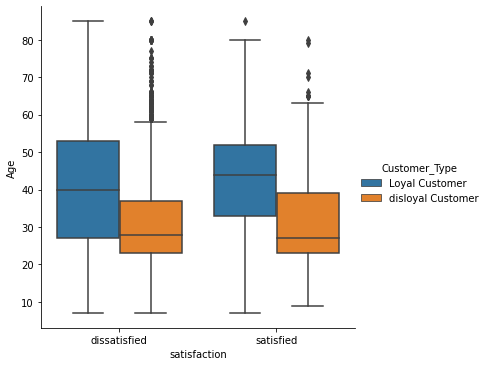

In [23]:
sns.catplot(x = 'satisfaction', y = 'Age', hue = "Customer_Type", 
            data = airline_df, kind = 'box', ci = None)

### Changing satisfaction variable to dummy variables (0,1) to run more code
I decided to change our satisfaction variable to a dummy variable so I could visualize it in a heat map.
Thus, within the satisfaction column, dissatisfied becomes 0 while satisfied becomes 1. 

I run the value_counts to reconfirm this.

In [24]:
expl_df['satisfaction'] = expl_df['satisfaction'].astype('category')
expl_df['satisfaction'] = pd.get_dummies(expl_df['satisfaction'], prefix_sep='_', drop_first=True)
expl_df.satisfaction.value_counts()

0    20792
1    19323
Name: satisfaction, dtype: int64

In [25]:
exp_variables = ['satisfaction', 'Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']

In [26]:
expl_df[exp_variables]

,satisfaction,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
1043,0,1,1,1,1,3,1,5,3,1,4,1,2,2,3
1044,0,1,1,1,1,5,1,5,5,1,5,2,1,2,5
1047,0,1,1,1,1,5,1,5,5,3,2,1,3,2,5
1050,0,1,1,1,1,3,1,3,3,3,4,1,2,1,3
1052,0,1,1,1,1,2,1,2,2,1,5,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129870,1,5,4,5,1,5,5,5,5,3,2,4,5,4,5
129873,1,5,5,4,4,3,4,3,3,5,2,5,3,5,3
129876,0,2,3,2,4,2,1,1,3,2,3,3,1,2,1
129878,0,3,2,3,2,3,2,2,3,3,2,3,2,1,2


### HeatMap to show which attributes are important for Satisfaction
The heatmap reveals which survey attributes are the most important in terms of customer satisfaction.
The darker a square is, the more positively correlated it is with satisfaction. The lighter it is, the more negatively correlated it is with satisfaction.

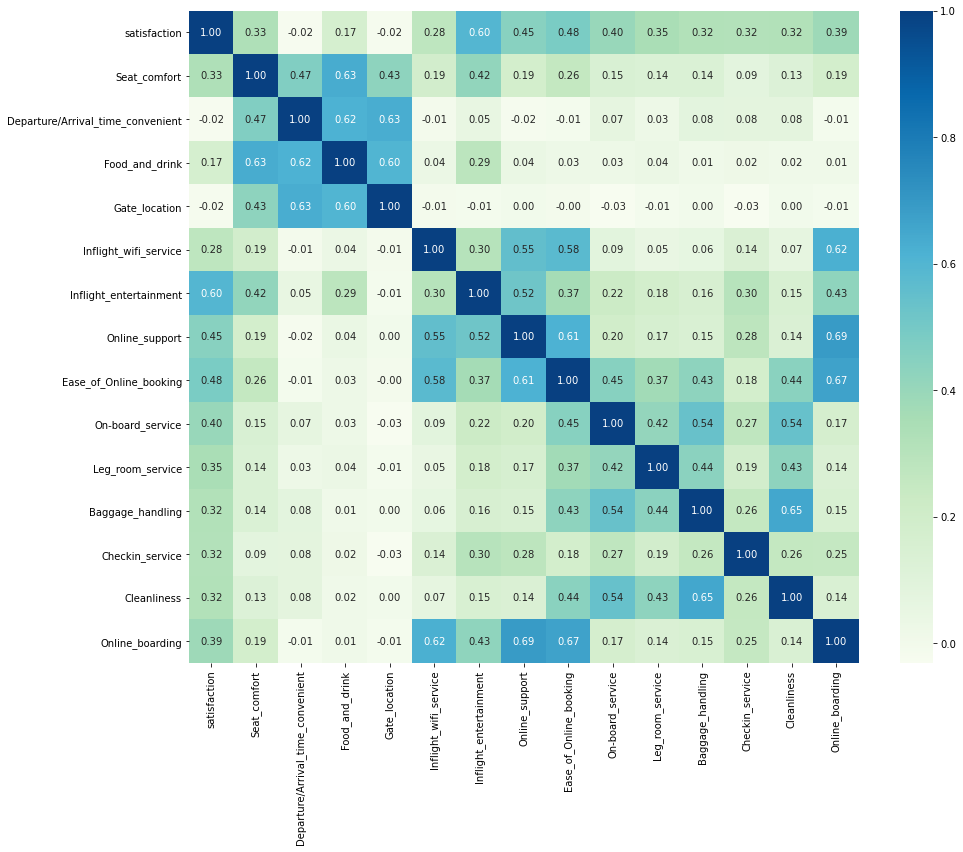

In [27]:
plt.figure(figsize=(15,12))
corr = expl_df[exp_variables].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="GnBu")
plt.show()

### HeatMap Results
We want to find the darker squares, since we care more about satisfisied customers.
The top 5 variables which affect satisfised customers are __Inflight_entertainment__, __Ease_of_Online_booking__, __Online_support__, __On-board_service__, and __Online_boarding__.

## Decision Tree Model

In [28]:
from sklearn.model_selection import train_test_split
predictors = ['Seat_comfort',
       'Departure/Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']
outcome = 'satisfaction'

x = expl_df[predictors]
y = expl_df[outcome]

# partition data
trainx, validx, trainy, validy = train_test_split(x, y, test_size=0.3, random_state=1)
print('Training set:', trainx.shape, 'Validation set:', validx.shape)

Training set: (28080, 14) Validation set: (12035, 14)


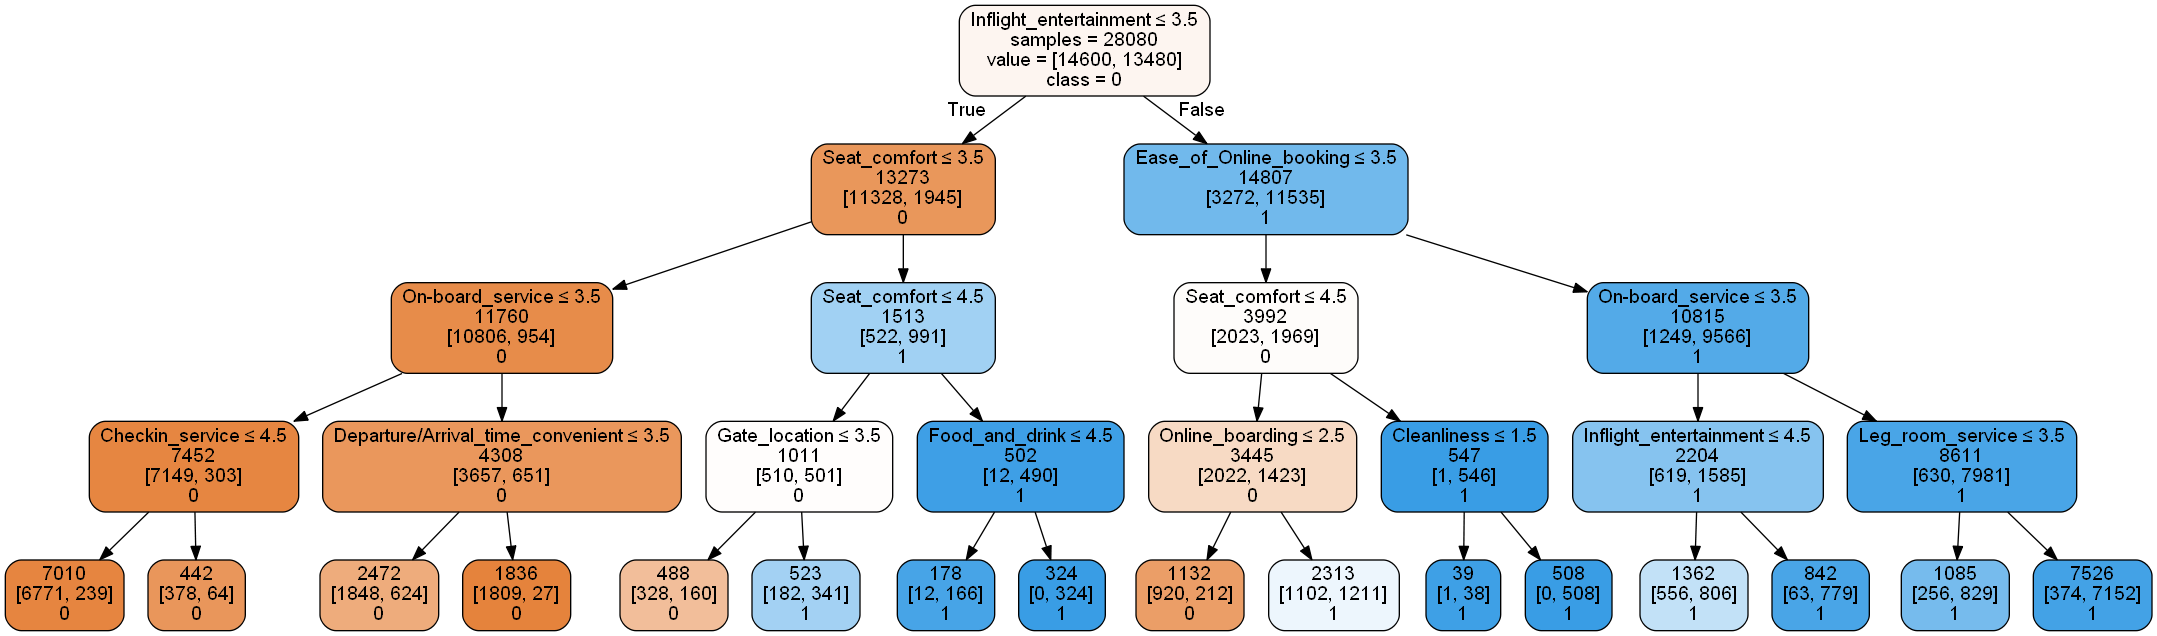

In [29]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(trainx, trainy)

plotDecisionTree(dt, feature_names=expl_df[predictors].columns, class_names=dt.classes_)

In [30]:
importances = dt.feature_importances_
df = pd.DataFrame({'feature': trainx.columns, 'importance': importances})
df = df.sort_values('importance', ascending = False)
print(df)

                              feature  importance
5              Inflight_entertainment    0.663938
0                        Seat_comfort    0.158110
7              Ease_of_Online_booking    0.103711
8                    On-board_service    0.025324
13                    Online_boarding    0.019969
1   Departure/Arrival_time_convenient    0.013832
9                    Leg_room_service    0.007643
3                       Gate_location    0.006162
11                    Checkin_service    0.001184
2                      Food_and_drink    0.000121
12                        Cleanliness    0.000006
4               Inflight_wifi_service    0.000000
6                      Online_support    0.000000
10                   Baggage_handling    0.000000


<Figure size 1080x576 with 0 Axes>

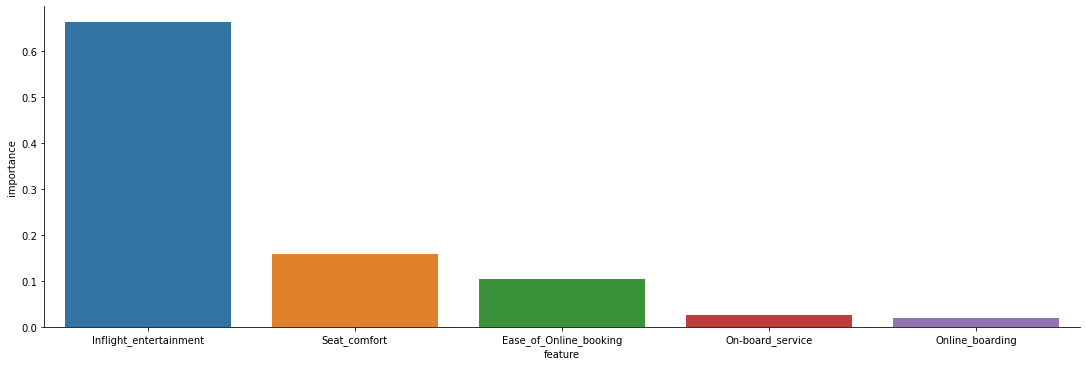

In [31]:
plt.figure(figsize=(15,8))
sns.catplot(x = 'feature', y = 'importance', kind = 'bar', 
            data = df.head(5), height = 5, aspect = 3)

## Conclusion
Airlines should focus on improving these services since they have high importance with satisfied customers.